___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://lh3.googleusercontent.com/proxy/vrI6R6joAkc0h41EgVQIiqxoWNc8xMAuPjUoE4X05WAfjJ0ezmYKKWXff4juouqRByJBFFeMDQPLUuCxBdr93DP04ve__2hp4PxmXtDM9QmRmttt_08e8urURFQXJuaAgYgQ52Yf_Np7gN8qob65XJDOiS9VMtnTqh8E4qCsEa876-67nReKeYxkv-lloCoCW8DgEk2cLGRgwcUOvRs9z4O-ehWgQ8aw7lR5xWgoRUM" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2022
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___


### <font color= #2E9AFE> Tema: Clustering Jerárquico</font>

#### ¿Qué es?

Es un algoritmo que agrupa objetos similares dentro de grupos llamados *clusters*. 

El punto final es un conjunto de clusters, donde cada cluster es distinto entre sí y los objetos dentro de cada cluster son muy similares entre sí. 


#### Tipos de cluster jerárquico

- Aglomerativo:
    - Comenzar en cada observación como cluster individual
    - En cada paso, combinar el par de clusters más cercano hasta que sólo quede uno
    
- Divisivo:
    - Comenzar con un único cluster que englobe todas las observaciones de nuestro conjunto de datos
    - En cada paso, partir un cluster hasta que cada cluster contenga una única observación
    

#### Pasos para el clustering jerárquico (algomerativo)

- Al inicio, tratar a cada dato individual como un cluster. Por lo tanto al iniciar, el número de clusters al inicio va a ser "n", donde "n" es un número entero representando el total de observaciones
- Formar un cluster uniendo dos observaciones que estén los más cercanas, resultando en "n-1" clusters
- Formar más clusters uniendo las siguientes dos observaciones que estén lo más cercanas, resultando en "n-2" clusters
- Repetir hasta que un cluster grande se forme. 

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://cdn-dfnaj.nitrocdn.com/xxeFXDnBIOflfPsgwjDLywIQwPChAOzV/assets/static/optimized/rev-6df15ef/wp-content/uploads/2018/03/Hierarchical-clustering-3-1.png" width="350px" height="180px" />

El **dendograma** nos puede ayudar a determinar el número adecuado de grupos.


<img style="float: center; margin: 15px 15px 15px 15px;" src="https://cdn-dfnaj.nitrocdn.com/xxeFXDnBIOflfPsgwjDLywIQwPChAOzV/assets/static/optimized/rev-6df15ef/wp-content/uploads/2018/03/Screen-Shot-2018-03-28-at-11.48.48-am.png" width="350px" height="350px" />

**Medidas de distancia (similitud)**

La distancia entre dos clusters es generada basada en el tamaño de la línea entre un cluster y otro. Comúnmente se usa la distancia euclidiana. 

**Criterio de Linkage**

Después de elegir la métrica de distancia que se va a usar, es necesario determinar desde dónde se va a calcular esa distancia. Por ejemplo, se puede calcular desde:

- Las partes más similares del cluster (single-linkage)
- Las dos partes menos similares del cluster (complete-linkage)
- El promedio de los clusters (mean /average-linkage)
- Basada en minimizar la suma de residuales al cuadrado (Ward linkage)

In [1]:
#Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler


#### Explicando los dendogramas

In [2]:
#Datos ficticios
df = pd.DataFrame({'Col1': [5, 9, 13, 22, 31, 90, 81, 70, 45, 73, 85],
                   'Col2': [2, 8, 11, 10, 25, 80, 90, 80, 60, 62, 90]})

df

,Col1,Col2
0,5,2
1,9,8
2,13,11
3,22,10
4,31,25
5,90,80
6,81,90
7,70,80
8,45,60
9,73,62


In [3]:
#convertir a arreglo
arr = np.array(df)
arr

array([[ 5,  2],
       [ 9,  8],
       [13, 11],
       [22, 10],
       [31, 25],
       [90, 80],
       [81, 90],
       [70, 80],
       [45, 60],
       [73, 62],
       [85, 90]])

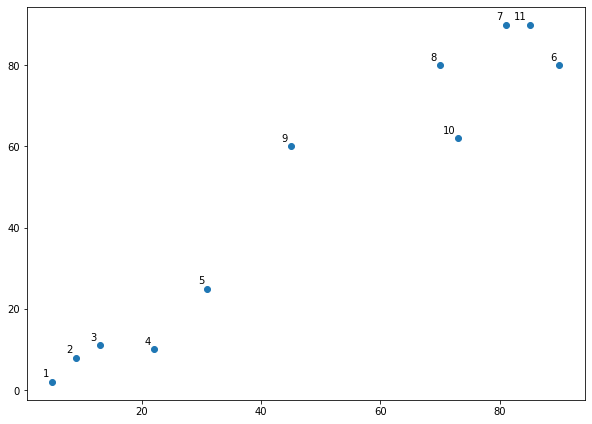

In [4]:
#Graficar datos
labels = range(1, 12)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(arr[:,0],arr[:,1])

for label, x, y in zip(labels, arr[:, 0], arr[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

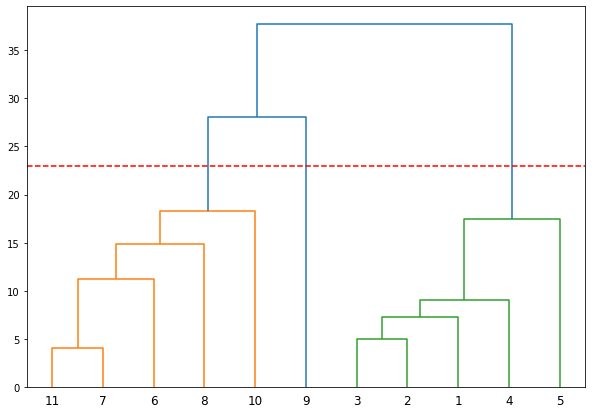

In [5]:
#Graficado el dendograma
linked = linkage(arr, 'single')

labelList = range(1, 12)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.axhline(y=23, color='r', linestyle='--')
plt.show()

El algoritmo inicial busca los dos puntos que están más cercanos uno de otro, basándose en la distancia euclidiana. 

La distancia vertical del dendograma muestra la distancia euclidiana entre puntos. 

**¿Cómo leemos el gráfico?**

Los puntos del 1-5 forman un cluster, mientras que los puntos 6,7,8, 0 y 11 forman otro cluster. 

El punto 9 parece haber formado su propio cluster. 

Podemos observar que la mayor distancia vertical sin ninguna línea horizontal que la atraviese está representada por una línea azul. Así que se dibuja una lína roja horizontal dentro del dendograma que pasa por la línea azul. 

Dado que esta línea roja cruza la línea azul en tres puntos, el número de grupos/clusters es de 3. 

In [6]:
#Haciendo predicciones 
#Usando scikit learn - cluster aglomerativo
from sklearn.cluster import AgglomerativeClustering

#Inicializo el objeto con 3 grupos
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

#Aplico el clustering a mis datos
hc.fit_predict(arr)

array([1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0])

In [7]:
arr

array([[ 5,  2],
       [ 9,  8],
       [13, 11],
       [22, 10],
       [31, 25],
       [90, 80],
       [81, 90],
       [70, 80],
       [45, 60],
       [73, 62],
       [85, 90]])

In [8]:
#etiqueta de los clusters al que cada observación corresponde
print(hc.labels_)

[1 1 1 1 1 0 0 0 2 0 0]


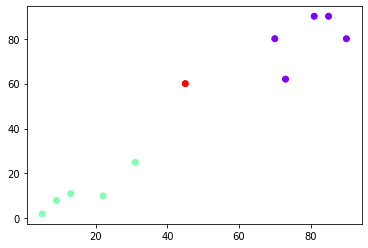

In [9]:
#Graficar nuestros clusters
plt.scatter(arr[:,0],arr[:,1], c=hc.labels_, cmap='rainbow')

#### Otro ejemplo

Tenemos datos de clientes de un centro comercial y queremos segmentar por grupos a los clientes basados en sus patrones de compra. 

Los datos se pueden descargar de:
https://stackabuse.s3.amazonaws.com/files/hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv

In [10]:
#Cargar datos
customer_data = pd.read_csv('hierarchical.csv')
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Los datos tienen cinco columnas: CustomerID, Genre, Age, Annual Income y Spending Score.

Para ver los resultados en un espacio de características bidimensional, solo conservaremos dos de estas cinco columnas.
Podemos eliminar la columna CustomerID, Genre y Age.
La columna Spending Score indica la frecuencia con la que una persona gasta dinero en un centro comercial en una escala del 1 al 100, siendo 100 el que más gasta. 

In [11]:
customer_data.shape

(200, 5)

In [12]:
#Para poder ver los resultados en dos dimensiones, sólo vamos a dejar 2 columnas
#Vamos a dejar sólo el Ingreso anual y el Spending score
data = customer_data.iloc[:, 3:5].values

In [13]:
#convertir dataframe a arreglo
arr = np.array(data)

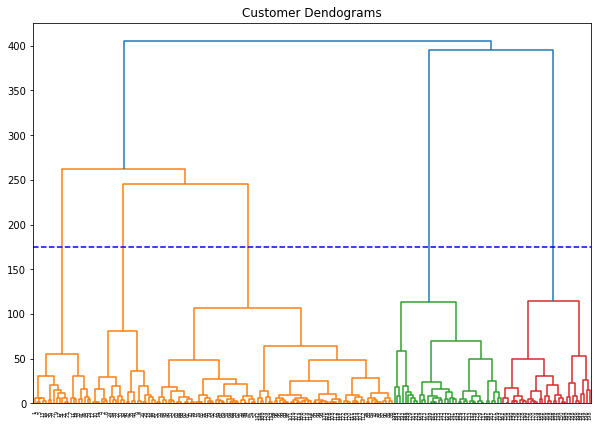

In [14]:
#¿Cuántos clusters vamos a utilizar?
#Utilizamos scipy para crear el dendogrma

import scipy.cluster.hierarchy as shc
#Graficar el dendograma
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.axhline(y=175, color='b', linestyle='--')

La decisión del # de clusters que mejor pueden representar diferentes grupos se puede elegir observando el dendrograma.

La mejor elección del # de clusters es el # de líneas verticales en el dendrograma cortadas por una línea horizontal que puede atravesar la distancia máxima verticalmente sin intersectar un grupo.

In [15]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, linkage='ward', affinity='euclidean')
cluster.fit_predict(data)


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

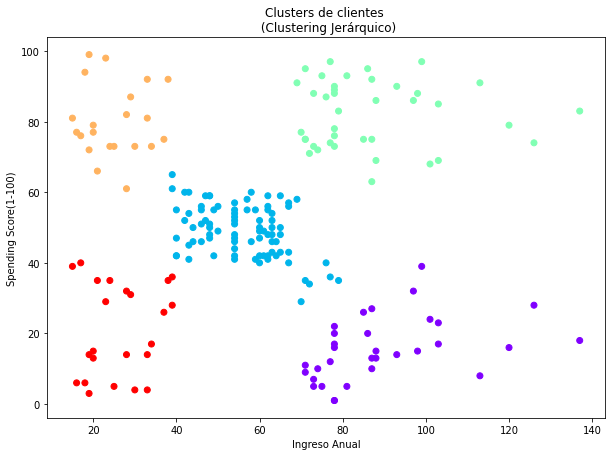

In [16]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.title('Clusters de clientes \n (Clustering Jerárquico)')
plt.xlabel('Ingreso Anual')
plt.ylabel('Spending Score(1-100)')
plt.show()

Se pueden ver los puntos de datos en forma de cinco grupos. 

Los datos en la parte inferior derecha pertenecen a los clientes con salarios altos pero gastos bajos. Estos son los clientes que gastan su dinero con cuidado. 

Del mismo modo, los clientes en la parte superior derecha (puntos de datos verdes), estos son los clientes con altos salarios y altos gastos. Estos son el tipo de clientes a los que se dirigen las empresas.

Los clientes en el medio (puntos de datos azules) son los que tienen ingresos medios y salarios medios. El mayor número de clientes pertenece a esta categoría. Las empresas también pueden dirigirse a estos clientes dado el hecho de que son enormes, etc.


| Cluster      | Salario Anual vs. Nivel de gasto            | Segmento       |
|--------------|---------------------------------------------|----------------|
| 1 (morado)   | Ingresos altos vs. Nivel de gasto bajo      | Cuidado        |
| 2 (azul)     | Ingresos normales vs. Nivel de gasto normal | Estándar       |
| 3 (verde)    | Ingresos altos vs. Nivel de gasto alto      | Grupo Objetivo |
| 4 (amarillo) | Ingresos bajos vs. Nivel de gasto alto      | Sin cuidado    |
| 5 (rojo)     | Ingresos bajos vs. Nivel de gasto bajo      | Sensible       |

#### Comparación con Kmeans

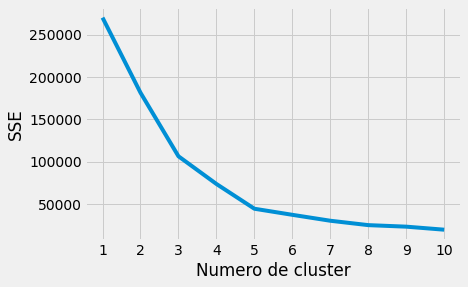

In [17]:
from sklearn.cluster import KMeans

#Elegir número de clusters (k)
kmeans_kwargs = {
       "init": "random",
       "n_init": 10,
       "max_iter": 300,
       "random_state": 42,
}

#Calculamos la suma del error cuadrático (SSE) para cada "k" de clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)
    
#Graficamos
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Numero de cluster")
plt.ylabel("SSE")
plt.show()

In [18]:
from kneed import KneeLocator
kl = KneeLocator(
     range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

5

In [19]:
#Inicializar kmeans
from sklearn.cluster import KMeans

kmeans = KMeans(
       init="random",
       n_clusters=5,
       n_init=10,
       max_iter=300,
       random_state=42)

#Entrenar datos
kmeans.fit(data)

KMeans(init='random', n_clusters=5, random_state=42)

In [20]:
#Grupos
y_kmeans = kmeans.fit_predict(data)
y_kmeans

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2,
       0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 4, 2, 4, 1, 4, 1, 4,
       2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

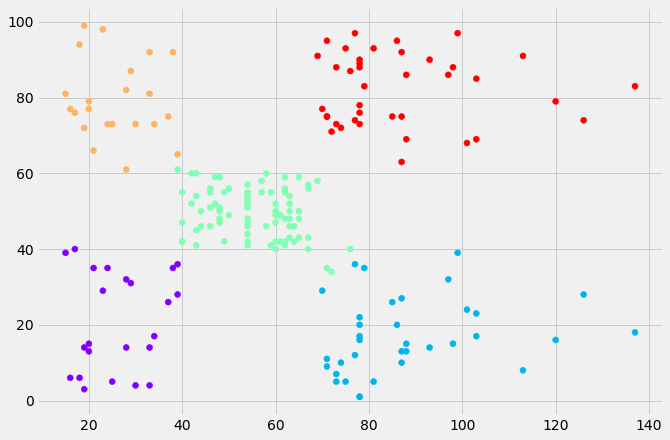

In [21]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_, cmap='rainbow')

#### Kmeans vs clustering jerárquico

**K Means**
- Se necesita tener un número pre-determinado de número de clusters. Se requiere conocimiento de "K"
- Puede manejar grandes cantidades de datos
- Los resultados dependen mucho de dónde se eligieron los clusters iniciales

**Jerárquico**
- No necesita tener un número pre-determinado de número de clusters
- No funciona tan bien con grandes cantidades de datos
- Los resultados no cambian mucho